# UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

* Hiring and retaining employees are extremely complex tasks that require capital, time and skills.
* "Small business owners spend 40% of their working hours on tasks that do not generate any income such as hiring".
* "Companies spend 15% - 20% of the employee's salary to recruit a new candidate".

[Source](https://toggl.com/blog/cost-of-hiring-an-employee)

* "An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed".
Hiring a new employee costs an average of $7645 (0 - 500 corporation).
* It takes 52 days on average to fill a position.

[Source](https://toggl.com/blog/cost-of-hiring-an-employee)

* The HR team collected extensive data on their employees and approached you to develop a model that could predict which employees are more likely to quit.
* The team provided you with an extensive data, here's a sample of the dataset:
    * JobInvolvement
    * Education
    * JobSatisfaction
    * PerformancRating
    * RelationshipSatisfaction
    * WorkLifeBalance

[DataSource](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

# IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# You have to include the full link to the csv file containing your dataset
cwd = os.getcwd()
data_dir_path = os.path.join(cwd, "data")
data_file = os.path.join(data_dir_path, "Human_Resources.csv")

employee_df = pd.read_csv(data_file)

In [3]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
# use describe and info and find how many features have data type of int64.
numeric_features = employee_df.select_dtypes(include=['int64']).shape[1]
numeric_features

26

In [7]:
# get the mean of the age column
age_mean = employee_df['Age'].mean()
age_mean

np.float64(36.923809523809524)

# VISUALIZE DATASET

In [8]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations
employee_df['Attrition'] = employee_df['Attrition'].map({'Yes': 1, 'No': 0})
employee_df['OverTime'] = employee_df['OverTime'].map({'Yes': 1, 'No': 0})
employee_df['Over18'] = employee_df['Over18'].map({'Y': 1, 'N': 0})

In [9]:
# business travel conversion
employee_df['BusinessTravel'] = employee_df['BusinessTravel'].map({
    'Travel_Rarely': 0,
    'Travel_Frequently': 1,
    'Non-Travel': 2
})

In [10]:
# sales conversion
employee_df['Department'] = employee_df['Department'].map({
    'Sales': 0,
    'Research & Development': 1,
    'Human Resources': 2
})

In [ ]:
# education conversion
employee_df['EducationField'] = employee_df['EducationField'].map({
    'Life Sciences': 0,
    'Medical': 1,
    'Marketing': 2,
    'Technical Degree': 3,
    'Human Resources': 4,
    'Other': 5
})

In [12]:
# gender conversion
employee_df['Gender'] = employee_df['Gender'].map({'Male': 0, 'Female': 1})

In [13]:
# job role conversion
employee_df['JobRole'] = employee_df['JobRole'].map({
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
})

In [14]:
# marital status conversion
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].map({
    'Single': 0,
    'Married': 1,
    'Divorced': 2
})

<Axes: >

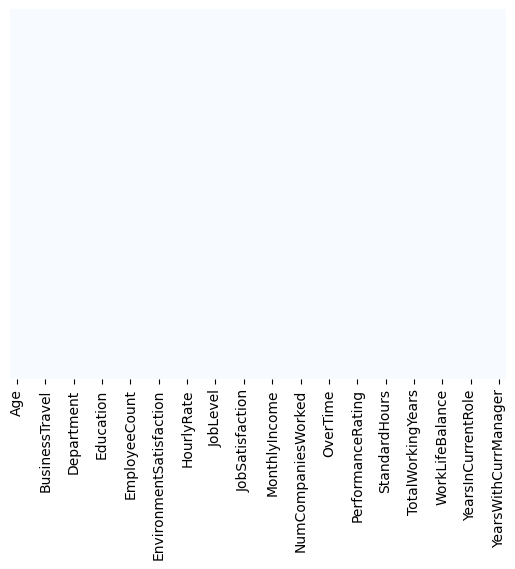

In [15]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employee_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'BusinessTravel'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'Department'}>,
        <Axes: title={'center': 'DistanceFromHome'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EducationField'}>,
        <Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobRole'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MaritalStatus'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
      

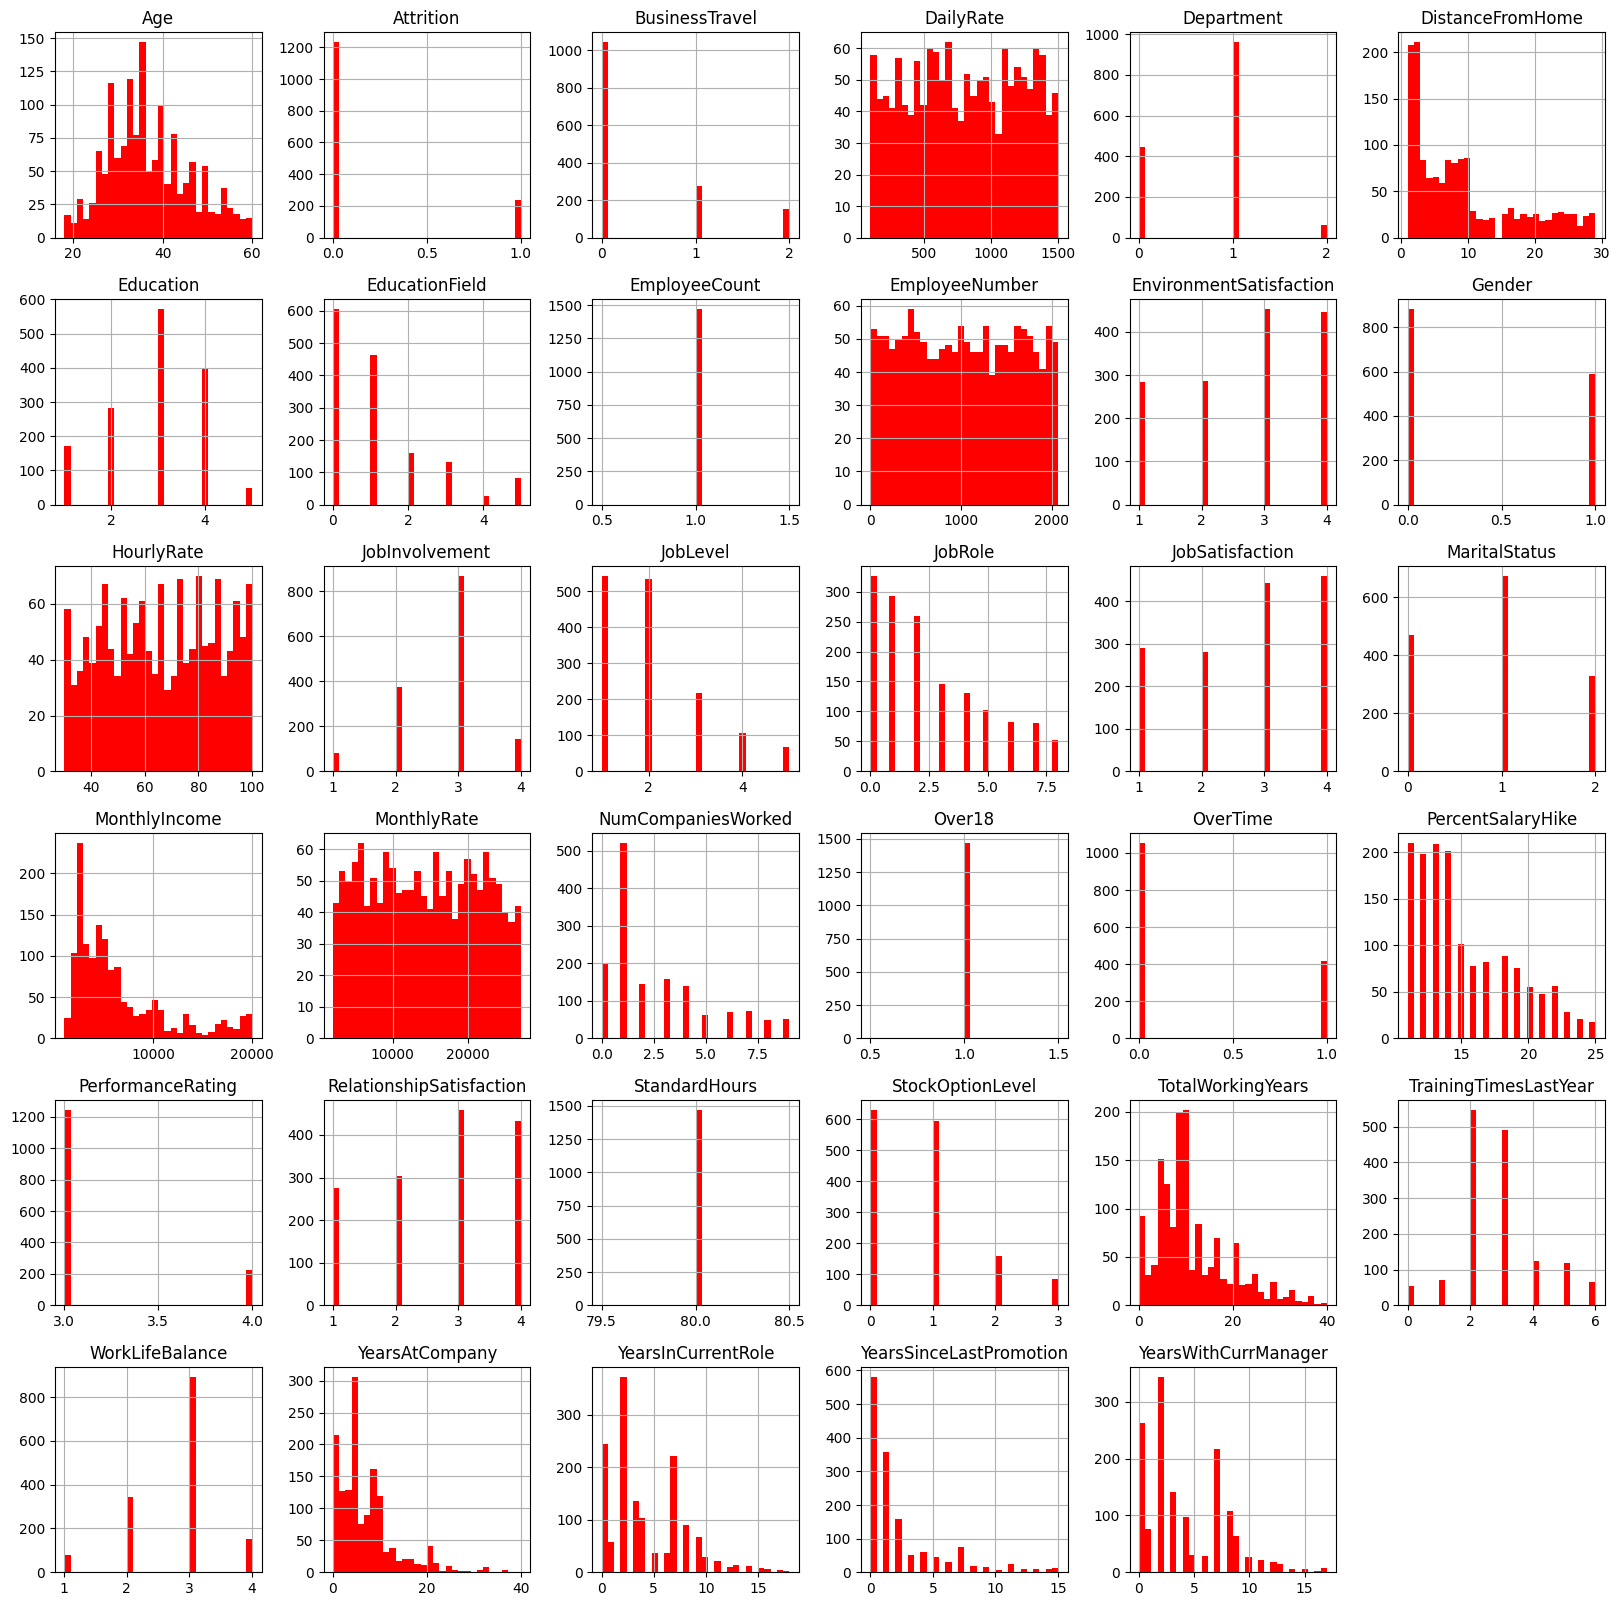

In [16]:
employee_df.hist(bins=30, figsize=(20, 20), color='red')
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [17]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [18]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,0,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,5,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,1,1,0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,1,3,0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,0,613,1,6,1,1,4,0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,0,155,1,4,3,0,2,0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,0,2,3,1,4,0,...,3,4,0,17,3,2,9,6,0,8


In [19]:
# Let's see how many employees left the company!
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

Total number of employees: 1470
Number of employees who stayed: 1233
Number of employees who left: 237
Percentage of employees who stayed: 83.88%
Percentage of employees who left: 16.12%


<Axes: >

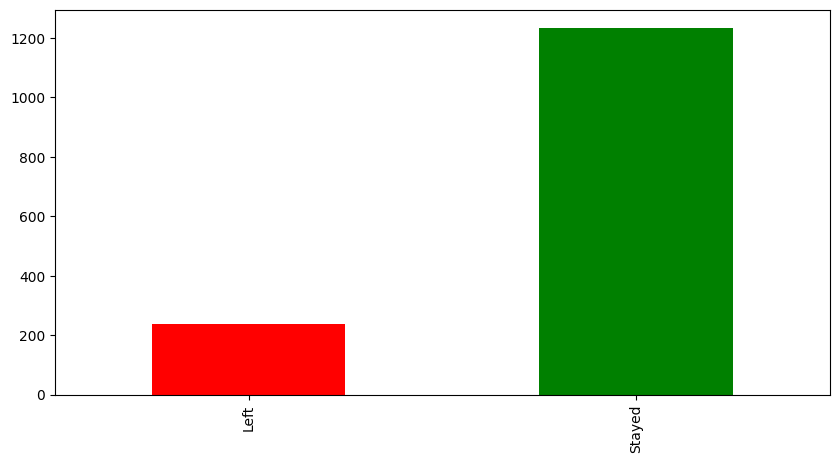

In [20]:
# Count the number of employees who stayed and left
print("Total number of employees:", employee_df.shape[0])
print("Number of employees who stayed:", stayed_df.shape[0])
print("Number of employees who left:", left_df.shape[0])

print("Percentage of employees who stayed: {:.2f}%".format((stayed_df.shape[0] / employee_df.shape[0]) * 100))
print("Percentage of employees who left: {:.2f}%".format((left_df.shape[0] / employee_df.shape[0]) * 100))

# It seems that we are dealing with an imbalanced dataset

# plot the number of employees who stayed, left. percentage of employees who stayed and left
row_counts = pd.Series({'Left': left_df.shape[0], 'Stayed': stayed_df.shape[0]})
plt.figure(figsize=(10, 5))
row_counts.plot(kind='bar', color=['red', 'green'])

In [21]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,0.392405,750.362869,0.662447,10.632911,2.839662,1.316456,2.464135,0.367089,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,0.584062,401.899519,0.571186,8.452525,1.008244,1.407103,1.169791,0.483031,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,0.000000,408.000000,0.000000,3.000000,2.000000,0.000000,1.000000,0.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,0.000000,699.000000,1.000000,9.000000,3.000000,1.000000,3.000000,0.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1.000000,1092.000000,1.000000,17.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,2.000000,1496.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [22]:
stayed_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,0.392539,812.504461,0.754258,8.915653,2.927007,1.122466,2.771290,0.406326,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,0.680200,403.208379,0.517973,8.012633,1.027002,1.377730,1.071132,0.491346,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,0.000000,477.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,0.000000,817.000000,1.000000,7.000000,3.000000,1.000000,3.000000,0.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1.000000,1176.000000,1.000000,13.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<Axes: >

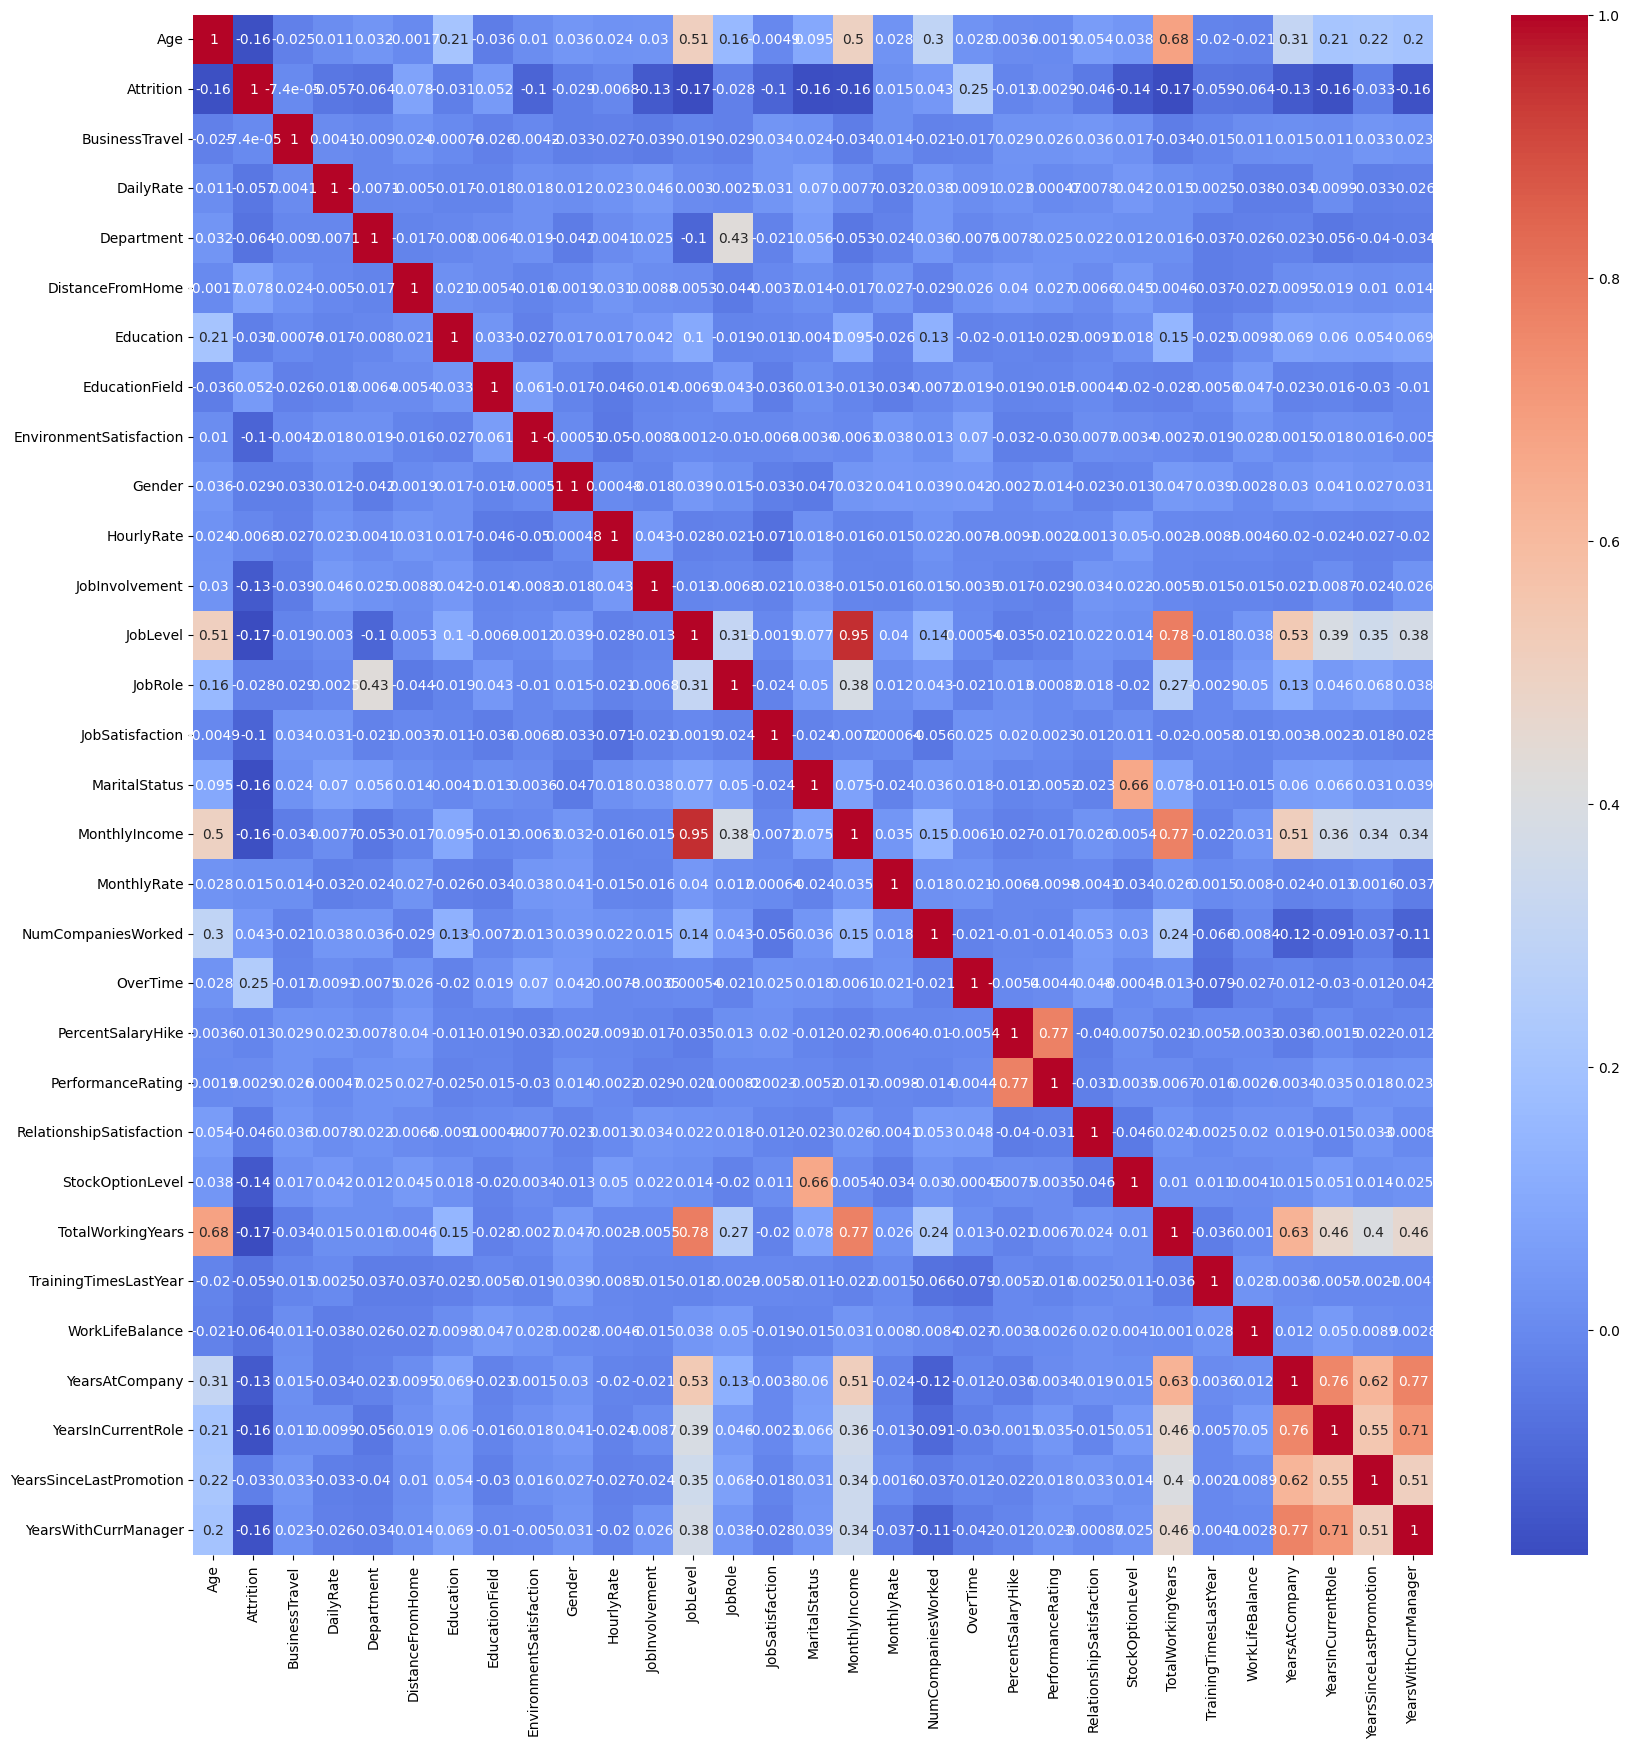

In [23]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
# Job level is strongly correlated with total working hours
# Monthly income is strongly correlated with Job level
# Monthly income is strongly correlated with total working hours
# Age is stongly correlated with monthly income


In [42]:
# business travel conversion
employee_df['BusinessTravel'] = employee_df['BusinessTravel'].map({
    0:'Travel_Rarely',
    1: 'Travel_Frequently',
    2: 'Non-Travel'
})

# sales conversion
employee_df['Department'] = employee_df['Department'].map({
    0: 'Sales',
    1: 'Research & Development',
    2: 'Human Resources'
})

# education conversion
employee_df['EducationField'] = employee_df['EducationField'].map({
    0: 'Life Sciences',
    1: 'Medical',
    2: 'Marketing',
    3: 'Technical Degree',
    4: 'Human Resources',
    5: 'Other'
})

# gender conversion
employee_df['Gender'] = employee_df['Gender'].map({0: 'Male', 1: 'Female'})

# job role conversion
employee_df['JobRole'] = employee_df['JobRole'].map({
    0: 'Sales Executive',
    1: 'Research Scientist',
    2: 'Laboratory Technician',
    3: 'Manufacturing Director',
    4: 'Healthcare Representative',
    5: 'Manager',
    6: 'Sales Representative',
    7: 'Research Director',
    8: 'Human Resources'
})

# marital status conversion
employee_df['MaritalStatus'] = employee_df['MaritalStatus'].map({
    0: 'Single',
    1: 'Married',
    2: 'Divorced'
})

<Axes: xlabel='Age', ylabel='count'>

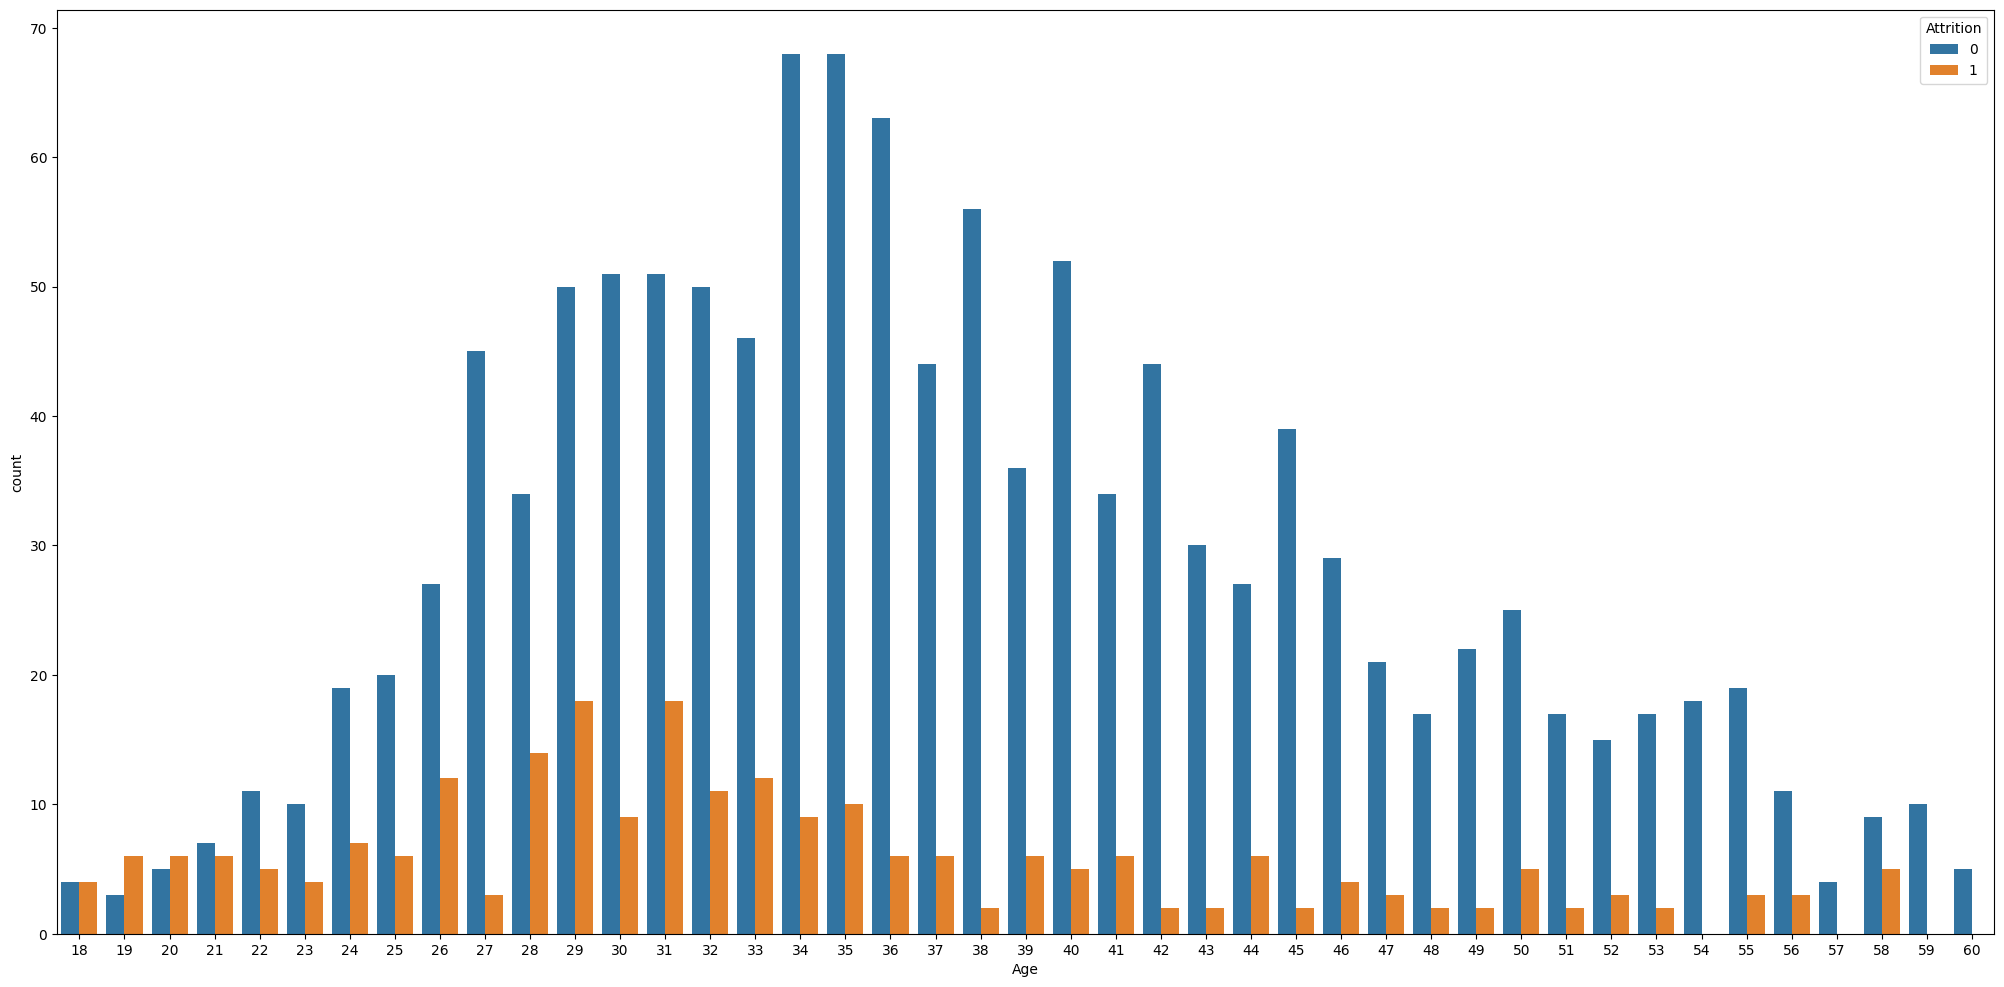

In [43]:
plt.figure(figsize=(25, 12))
sns.countplot(x='Age', hue='Attrition', data=employee_df)

<Axes: xlabel='JobLevel', ylabel='count'>

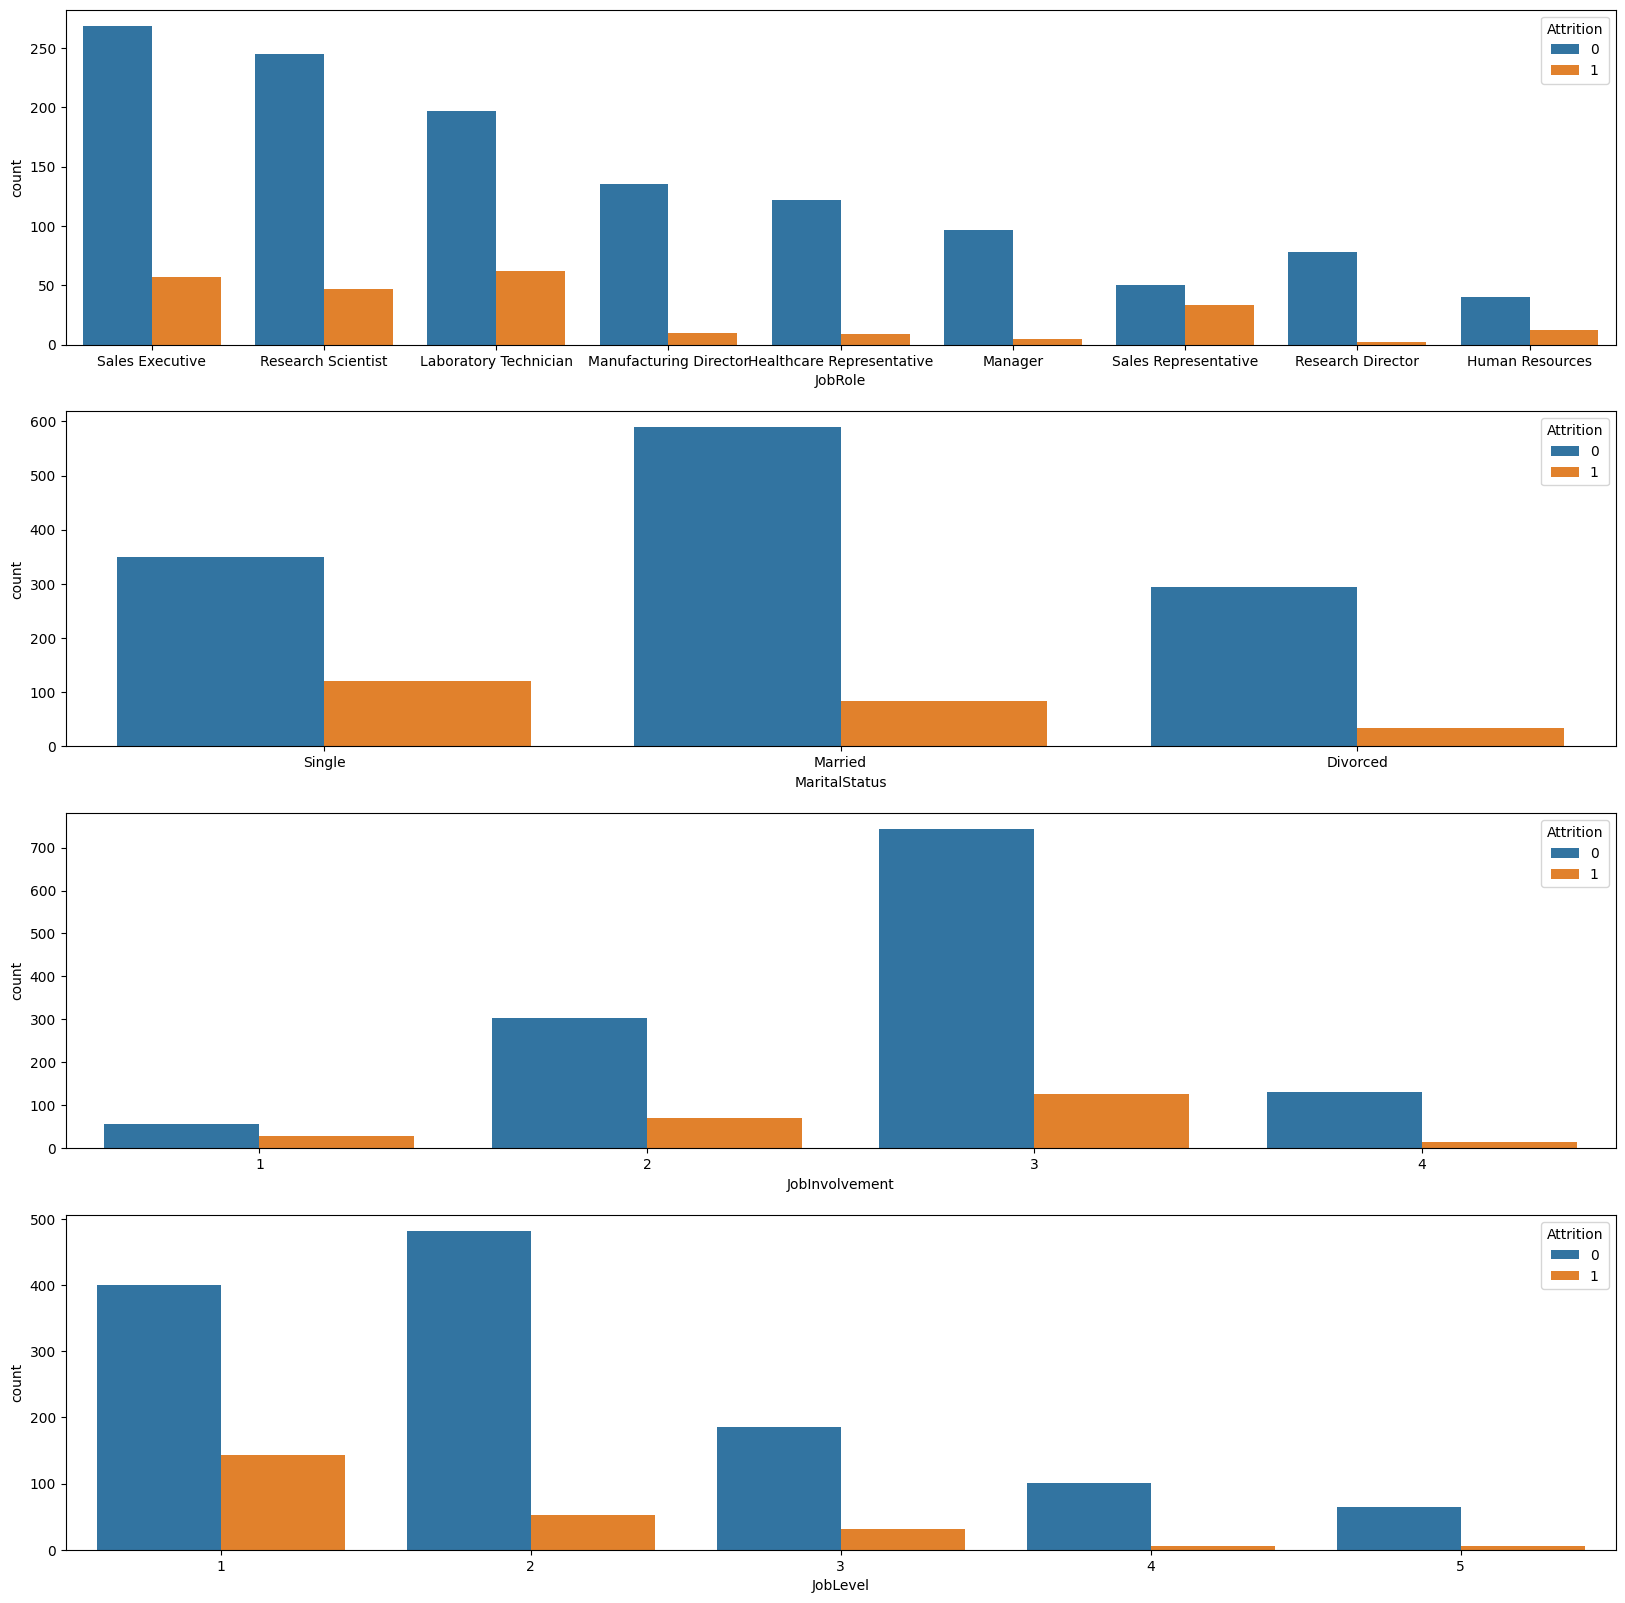

In [44]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 1, 1)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 2)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 3)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)

plt.subplot(4, 1, 4)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)

# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job
# Less involved employees tend to leave the company
# Less experienced (low job level) tend to leave the company

Text(0.5, 0, 'Distance from Home')

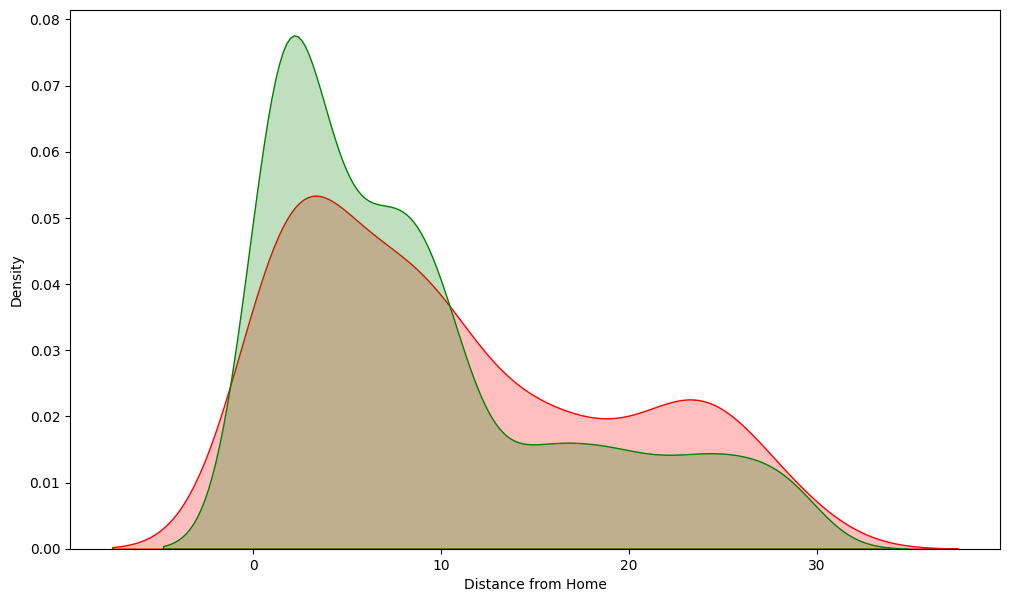

In [35]:

# KDE (Kernel Density Estimation) is used for visualizing the Probability Density of a continuous variable.
# KDE describes the probability density at different values in a continuous variable.

plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left', fill=True, color='red')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees who stayed', fill=True, color='green')

plt.xlabel('Distance from Home')

Text(0.5, 0, 'Years with Current Manager')

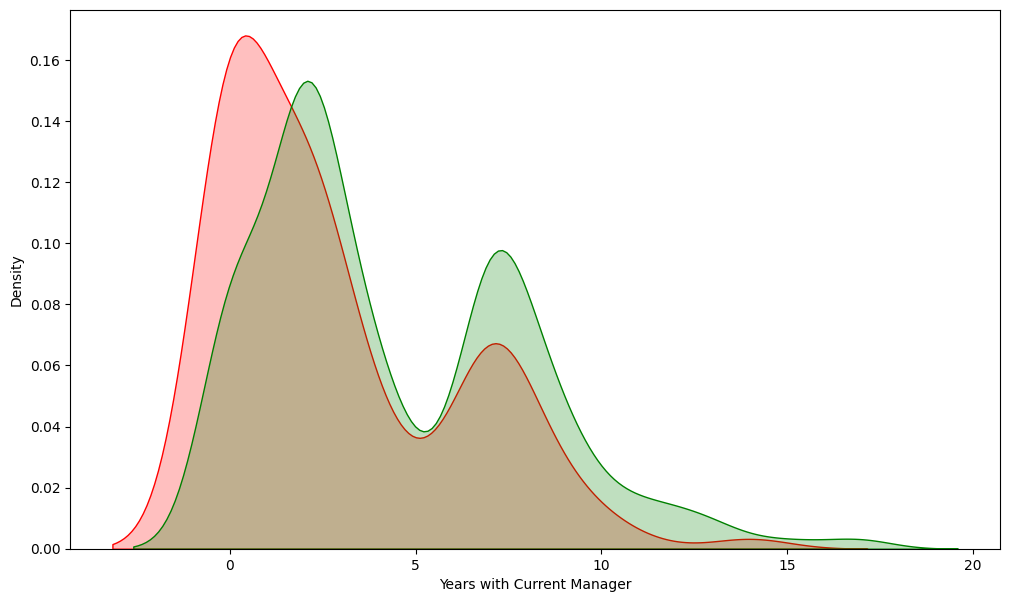

In [38]:
# KDE for years with current manager
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['YearsWithCurrManager'], label='Employees who left', fill=True, color='red')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employees who stayed', fill=True, color='green')
plt.xlabel('Years with Current Manager')

Text(0.5, 0, 'Total Working Years')

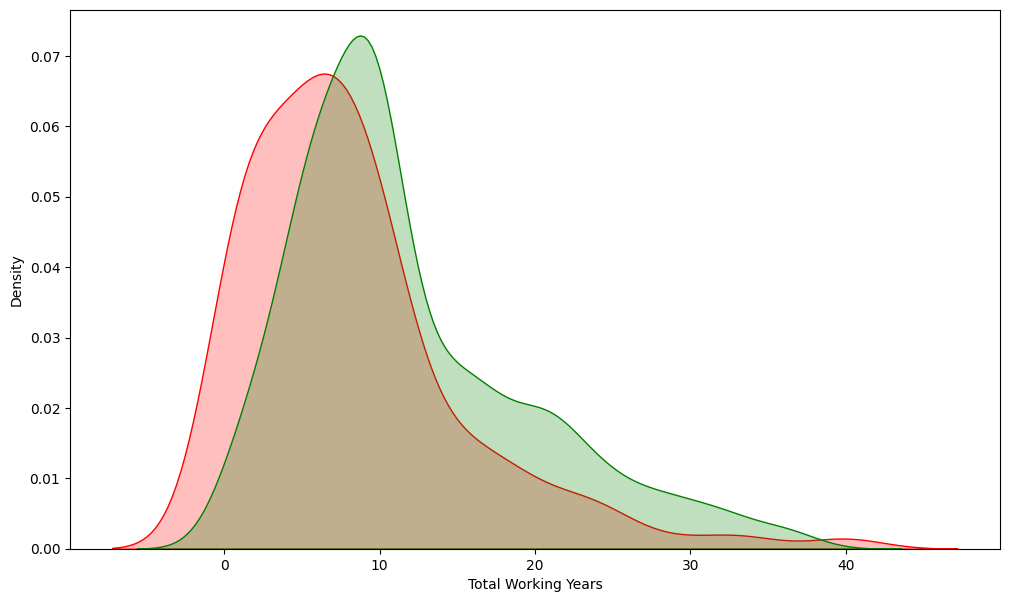

In [39]:

# KDE for total working years
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['TotalWorkingYears'], label='Employees who left', fill=True, color='red')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employees who stayed', fill=True, color='green')
plt.xlabel('Total Working Years')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

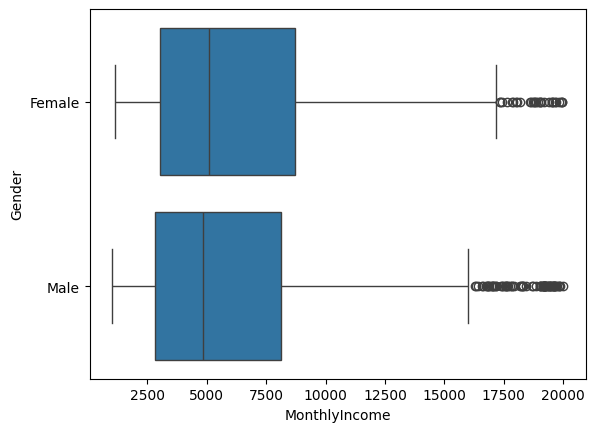

In [45]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

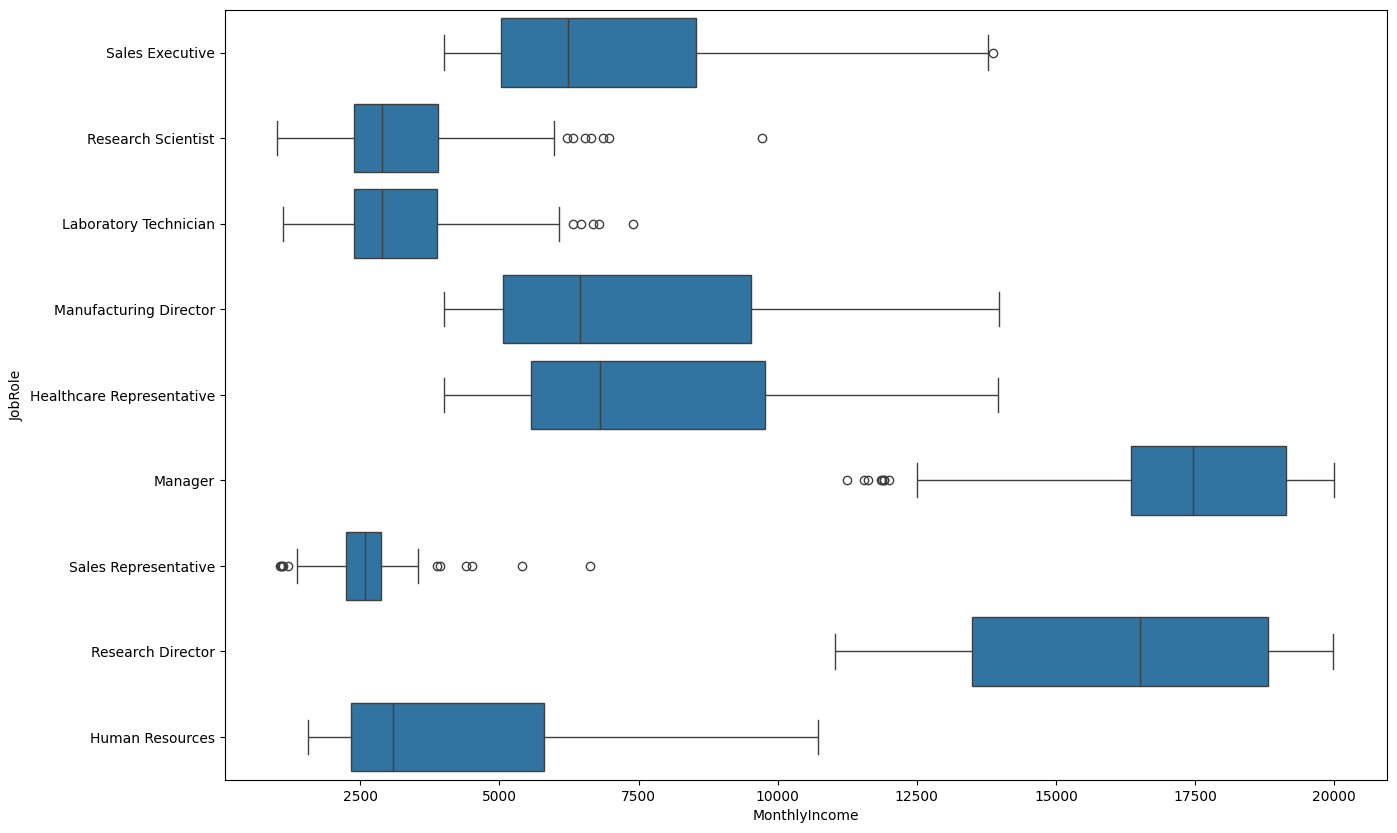

In [46]:
# Let's see the Gender vs. Monthly Income
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df)

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [27]:
# note that we dropped the target 'Atrittion'


# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [28]:
# Testing Set Performance


# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [29]:
# Testing Set Performance


# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [30]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)


In [31]:
# Testing Set Performance



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS